# 作業 3-2

- Name: **林啟允**
- Student ID: **C44056223**
- Final Edit Date: **2020/6/4**

## Github

- [Link](https://github.com/Chi-Yun-Lin/FDA_HW3_2)

## Data Set

[Tarvel Review Ratings Data Set](https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings#)

## 環境

|環境|名稱|版本|
|-|-|-|
|作業系統|Ubuntu|16.04.6 LTS|
|程式執行環境|jupyter notebook|1.0.0|
|python 版本|python3|3.6.9|
|安裝環境|pip|20.0.2|

## 安裝

```sh
pip install -r requirements.txt
```

## 計算資源

|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

## 參考連結

- 有無參考他人之實驗結果：無
- 參考連結：
    1. [LogisticRegression 相關參數說明文件](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    2. [Logistic Regression in Python](https://realpython.com/logistic-regression-python/)
    3. [MLPClassifier 相關參數說明文件](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
    4. [sklearn 神經網路 MLPClassifier 簡單應用與參數說明](https://www.jianshu.com/p/71fde5d90136)
    5. [KNeighborsClassifier 相關參數說明文件](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
    6. [KNN 算法的理解](https://blog.csdn.net/helloworld6746/article/details/50817427)
    7. [Hiding axis text in matplotlib plots](https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots)

## 分檔

code 請參見 `split_csv_file.ipynb`

- 內容
    - 將 `google_review_ratings.csv` 拆成十等分
        - 前九等分作為 Training Set，為 `train.csv`
        - 最後一等分作為 Testing Set，為 `test.csv`

## Outline

- [資料分析與前處理](#資料分析與前處理)
- [模型訓練(分類問題)](#模型訓練(分類問題))
- [套用模型至Testing_Set(分類問題)](#套用模型至Testing_Set(分類問題))

In [1]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('train.csv')      # 讀取資料，請勿更改路徑

## 資料分析與前處理

### 預覽訓練資料

利用下面三種方式對訓練資料做一個初步認識，並得到以下資訊:
- 4909 筆資料 (Row)
- 26 種資料類型 (Column)
- 含缺失值
- dtypes 為 object 有 2 個
- 驗證測試的答案需要自行生成

In [2]:
# 預覽訓練資料

df.head(10)                                     # 預覽訓練資料前 10 筆

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,...,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,...,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
# 預覽訓練資料

df.info()                                      # 輸出訓練資料型態與大小

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         4909 non-null   object 
 1   Category 1   4909 non-null   float64
 2   Category 2   4909 non-null   float64
 3   Category 3   4909 non-null   float64
 4   Category 4   4909 non-null   float64
 5   Category 5   4909 non-null   float64
 6   Category 6   4909 non-null   float64
 7   Category 7   4909 non-null   float64
 8   Category 8   4909 non-null   float64
 9   Category 9   4909 non-null   float64
 10  Category 10  4909 non-null   float64
 11  Category 11  4909 non-null   object 
 12  Category 12  4908 non-null   float64
 13  Category 13  4909 non-null   float64
 14  Category 14  4909 non-null   float64
 15  Category 15  4909 non-null   float64
 16  Category 16  4909 non-null   float64
 17  Category 17  4909 non-null   float64
 18  Category 18  4909 non-null   float64
 19  Catego

In [4]:
# 預覽訓練資料

df.describe()                                  # 輸出訓練資料統計資訊

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,...,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4908.000000,2.000000
mean,1.435598,2.317727,2.474105,2.810287,2.964484,2.908878,3.387993,2.587847,3.188680,2.906665,...,1.187201,0.944820,0.812760,0.953911,0.966767,0.945808,1.725278,1.527285,1.559044,1.810000
std,0.808844,1.422929,1.235632,1.323670,1.339887,1.277241,1.389720,1.110598,1.355963,1.318157,...,1.104259,0.972647,0.932317,1.193679,1.160858,0.910974,1.590626,1.323399,1.184839,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.530000,1.730000,1.780000,1.810000,2.010000,1.660000,1.830000,1.670000,...,0.700000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.320000,1.900000,2.070000,2.450000,2.670000,2.710000,3.230000,2.430000,2.860000,2.750000,...,0.800000,0.740000,0.680000,0.690000,0.690000,0.760000,1.010000,1.070000,1.290000,1.810000
75%,1.790000,2.660000,2.710000,4.140000,4.330000,3.870000,5.000000,3.220000,5.000000,3.760000,...,1.150000,0.910000,0.830000,0.850000,0.850000,0.990000,2.000000,1.520000,1.640000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


### 重新命名欄位名稱

- 由於欄位名稱都是 Category 或 Unnamed，不好區分差異，所以改用所評分的地點來命名

In [5]:
df = df.rename({'Category 1': 'churches',
                'Category 2': 'resorts',
                'Category 3': 'beaches',
                'Category 4': 'parks',
                'Category 5': 'theatres',
                'Category 6': 'museums',
                'Category 7': 'malls',
                'Category 8': 'zoos',
                'Category 9': 'restaurants',
                'Category 10': 'pubs/bars',
                'Category 11': 'local services',
                'Category 12': 'burger/pizza shops',
                'Category 13': 'hotels/other lodgings',
                'Category 14': 'juice bars',
                'Category 15': 'art galleries',
                'Category 16': 'dance clubs',
                'Category 17': 'swimming pools',
                'Category 18': 'gyms',
                'Category 19': 'bakeries',
                'Category 20': 'beauty & spas',
                'Category 21': 'cafes',
                'Category 22': 'view points',
                'Category 23': 'monuments',
                'Category 24': 'gardens',
                'Unnamed: 25': 'useless'}, axis='columns')

### 確認是否 rename 成功

In [6]:
# 預覽訓練資料

df.head(10)                                   # 預覽訓練資料前 10 筆

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,useless
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,...,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,...,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [7]:
df.info()                                      # 輸出訓練資料型態與大小

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   4909 non-null   object 
 1   churches               4909 non-null   float64
 2   resorts                4909 non-null   float64
 3   beaches                4909 non-null   float64
 4   parks                  4909 non-null   float64
 5   theatres               4909 non-null   float64
 6   museums                4909 non-null   float64
 7   malls                  4909 non-null   float64
 8   zoos                   4909 non-null   float64
 9   restaurants            4909 non-null   float64
 10  pubs/bars              4909 non-null   float64
 11  local services         4909 non-null   object 
 12  burger/pizza shops     4908 non-null   float64
 13  hotels/other lodgings  4909 non-null   float64
 14  juice bars             4909 non-null   float64
 15  art 

In [8]:
df.describe()                                  # 輸出訓練資料統計資訊

,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs/bars,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,useless
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,...,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4908.000000,2.000000
mean,1.435598,2.317727,2.474105,2.810287,2.964484,2.908878,3.387993,2.587847,3.188680,2.906665,...,1.187201,0.944820,0.812760,0.953911,0.966767,0.945808,1.725278,1.527285,1.559044,1.810000
std,0.808844,1.422929,1.235632,1.323670,1.339887,1.277241,1.389720,1.110598,1.355963,1.318157,...,1.104259,0.972647,0.932317,1.193679,1.160858,0.910974,1.590626,1.323399,1.184839,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.530000,1.730000,1.780000,1.810000,2.010000,1.660000,1.830000,1.670000,...,0.700000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.320000,1.900000,2.070000,2.450000,2.670000,2.710000,3.230000,2.430000,2.860000,2.750000,...,0.800000,0.740000,0.680000,0.690000,0.690000,0.760000,1.010000,1.070000,1.290000,1.810000
75%,1.790000,2.660000,2.710000,4.140000,4.330000,3.870000,5.000000,3.220000,5.000000,3.760000,...,1.150000,0.910000,0.830000,0.850000,0.850000,0.990000,2.000000,1.520000,1.640000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


### 資料視覺化

- 將資料前 100 筆以折線圖呈現
- 先假設跳舞和健身完的人會想吃東西，接著由折線圖觀察 `restaurants` 和 `dance clubs`、`gyms` 之間的關係
    - 問題: 是否喜歡舞蹈俱樂部或健身房的，會給予餐廳較高的評價?
    - 觀察結果: 可能有點關係

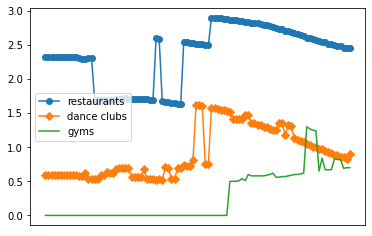

In [9]:
# 資料視覺化

import matplotlib.pyplot as plt               # 匯入資料視覺化模組

x = df['User'][:100]                          # 準備 x 軸資料
y_r = df['restaurants'][:100]                 # 準備 y 軸資料
y_d = df['dance clubs'][:100]                 # "
y_s = df['gyms'][:100]                        # "

plt.plot(x,                                   # 畫出 Open Price 折線圖
         y_r,
         marker='o',
         label='restaurants')
plt.plot(x,                                   # 畫出 Close Price 折線圖
         y_d,
         marker='D',
         label='dance clubs')
plt.plot(x,                                   # 畫出 High Price 折線圖
         y_s,
         label='gyms')

frame = plt.gca()
plt.legend()                                  # 顯示添加的標示
frame.axes.get_xaxis().set_visible(False)     # 將 x 軸擠成一團的 User 名稱隱藏
plt.show()                                    # 繪製圖表

### 生成驗證測試的答案

- 目標
    - 以**餐廳評價高低**作為驗證測試的答案 (分類問題)
- 評分標準
    - 評分**大於 2.5** 為高(1)
    - 評分**小於等於 2.5** 為低(0)
- 新增 `rs pred` 作為輸出結果

### 加入特徵值

- 以舞蹈俱樂部 (dance clubs) 及健身房 (gyms) 作為特徵值，測試訓練結果

In [10]:
# 生成驗證測試的答案
# 加入特徵值

df['rs pred'] = 0                                              # 新增 restaurants scoring prediction 的欄位並初始化為 0

# 將餐廳 (restaurants) 的 0~5 評分替換為只有高低兩種結果
# 1:高, 0:低
for x in range(0,len(df)):
    if df['restaurants'][x] > 2.5:                             # 餐廳 評分>2.5 設為評分高(1)
        df['rs pred'][x] = 1
    else:                                                      # 餐廳 評分<=2.5 設為評分低(0)
        df['rs pred'][x] = 0


train_x = df[['dance clubs', 'gyms']]                          # 取出訓練資料需要分析的資料欄位
train_y = df['rs pred']                                        # 取出訓練資料的答案

# 檢視訓練資料
train_x.info()
train_x.head(10)

/mnt/d/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/mnt/d/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dance clubs  4909 non-null   float64
 1   gyms         4909 non-null   float64
dtypes: float64(2)
memory usage: 76.8 KB


,dance clubs,gyms
0,0.59,0.0
1,0.59,0.0
2,0.59,0.0
3,0.59,0.0
4,0.59,0.0
5,0.59,0.0
6,0.59,0.0
7,0.60,0.0
8,0.60,0.0
9,0.59,0.0


## 模型訓練(分類問題)

使用 **5-fold cross validation** 對訓練資料先進行測試及驗證:
1. Logistic Regression
2. NN - Multilayer Perceptron Classifier
3. K Nearest Neighbor Classifier

使用**全部訓練資料**進行訓練:
1. Logistic Regression
2. NN - Multilayer Perceptron Classifier
3. K Nearest Neighbor Classifier

### 模型訓練 (Logistic Regression)

觀察訓練結果，可發現訓練準確度和驗證準確度的誤差值幾乎為 0%，但準確度不佳，僅有 68%

In [11]:
# 模型訓練 LR

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.linear_model import LogisticRegression   # 匯入邏輯迴歸模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model_LR = LogisticRegression(                    # 創造邏輯迴歸模型
        solver='liblinear',
        random_state=1012)
    model_LR.fit(train_x_split, train_y_split)        # 訓練邏輯迴歸模型
    
    train_pred_y = model_LR.predict(train_x_split)    # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model_LR.predict(valid_x_split)    # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.6886334722743014
    min train accuracy: 0.6817718940936863
    max train accuracy: 0.6931499872676343
average valid accuracy: 0.688740654928364
    min valid accuracy: 0.6690427698574338
    max valid accuracy: 0.7166156982670744


### 模型訓練 (NN - Multilayer Perceptron Classifier)

觀察訓練結果發現，訓練準確度和驗證準確度的誤差為 0.1%，但準確度不佳，僅有 65%

In [12]:
# 模型訓練 NN

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.neural_network import MLPClassifier      # 匯入多層感知分類器模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model_MLP = MLPClassifier(                        # 創造多層感知分類器模型
        alpha = 1e-5,
        hidden_layer_sizes=(5, 3),
        random_state=1012,
        early_stopping=True)
    model_MLP.fit(train_x_split, train_y_split)       # 訓練多層感知分類器模型
    
    train_pred_y = model_MLP.predict(train_x_split)   # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model_MLP.predict(valid_x_split)   # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.6561421476570632
    min train accuracy: 0.6489307535641547
    max train accuracy: 0.6600458365164248
average valid accuracy: 0.6557405365903282
    min valid accuracy: 0.6384928716904277
    max valid accuracy: 0.6860346585117227


### 模型訓練 (K Nearest Neighbor Classifier)

觀察訓練結果發現，訓練準確度和驗證準確度的誤差為 4%，且準確度有 83%

In [13]:
# 模型訓練 KNN

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.neighbors import KNeighborsClassifier    # 匯入 K 個最近鄰分類器模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model_KNC = KNeighborsClassifier(                 # 創造 K 個最近鄰分類器模型
        n_neighbors=5)
    model_KNC.fit(train_x_split, train_y_split)       # 訓練 K 個最近鄰分類器模型
    
    train_pred_y = model_KNC.predict(train_x_split)   # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model_KNC.predict(valid_x_split)   # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 0.8375941118902661
    min train accuracy: 0.8301502419149478
    max train accuracy: 0.8446651387827858
average valid accuracy: 0.7979216103938166
    min valid accuracy: 0.7871690427698574
    max valid accuracy: 0.8116089613034623


### 使用所有資料進行訓練

從下面三種模型的訓練結果可以發現，Logistic Regression 和 Multilayer Perceptron Classifier 的準確度都偏低，在上方的 cross validation 時也有一樣的情況，明顯可以得出一個結論:
- K Nearest Neighbor Classifier 明顯完勝另外兩種 classifiers，在沒有 overfitting 的情況下，準確度較高

#### Logistic Regression

In [14]:
# 使用 LogisticRegression

from sklearn.linear_model import LogisticRegression   # 匯入邏輯迴歸模型

model_LR.fit(train_x, train_y)                        # 訓練集合學習模型

pred_y = model_LR.predict(train_x)                    # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)                 # 計算準確度

print('accuracy: {}'.format(acc))                     # 輸出準確度

accuracy: 0.6887349765736402


#### Multilayer Perceptron Classifier

In [15]:
# 使用 MLPClassifier

from sklearn.neural_network import MLPClassifier      # 匯入多層感知分類器模型

model_MLP.fit(train_x, train_y)                       # 訓練支援向量機模型

pred_y = model_MLP.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)                 # 計算準確度

print('accuracy: {}'.format(acc))                     # 輸出準確度

accuracy: 0.6563454878794052


#### K Nearest Neighbor Classifier

In [16]:
# 使用 KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier    # 匯入 K 個最近鄰分類器模型

model_KNC.fit(train_x, train_y)                       # 訓練決策樹模型

pred_y = model_KNC.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)                 # 計算準確度

print('accuracy: {}'.format(acc))                     # 輸出準確度

accuracy: 0.8419229985740476


## 套用模型至Testing_Set(分類問題)

### 測試資料分析與前處理

得到資訊:
- 547 筆資料 (Row)
- 26 種資料類型 (Column)
- 不含缺失值
- dtypes 為 object 有 1 個
- 驗證測試的答案需要自行生成

In [17]:
df_test = pd.read_csv('test.csv')                    # 讀取測試資料

df_test.info()                                       # 預覽測試資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         547 non-null    object 
 1   Category 1   547 non-null    float64
 2   Category 2   547 non-null    float64
 3   Category 3   547 non-null    float64
 4   Category 4   547 non-null    float64
 5   Category 5   547 non-null    float64
 6   Category 6   547 non-null    float64
 7   Category 7   547 non-null    float64
 8   Category 8   547 non-null    float64
 9   Category 9   547 non-null    float64
 10  Category 10  547 non-null    float64
 11  Category 11  547 non-null    float64
 12  Category 12  547 non-null    float64
 13  Category 13  547 non-null    float64
 14  Category 14  547 non-null    float64
 15  Category 15  547 non-null    float64
 16  Category 16  547 non-null    float64
 17  Category 17  547 non-null    float64
 18  Category 18  547 non-null    float64
 19  Category

### 重新命名欄位名稱

- 由於欄位名稱都是 Category 或 Unnamed，不好區分差異，所以改用所評分的地點來命名

In [18]:
df_test = df_test.rename({'Category 1': 'churches',
                          'Category 2': 'resorts',
                          'Category 3': 'beaches',
                          'Category 4': 'parks',
                          'Category 5': 'theatres',
                          'Category 6': 'museums',
                          'Category 7': 'malls',
                          'Category 8': 'zoos',
                          'Category 9': 'restaurants',
                          'Category 10': 'pubs/bars',
                          'Category 11': 'local services',
                          'Category 12': 'burger/pizza shops',
                          'Category 13': 'hotels/other lodgings',
                          'Category 14': 'juice bars',
                          'Category 15': 'art galleries',
                          'Category 16': 'dance clubs',
                          'Category 17': 'swimming pools',
                          'Category 18': 'gyms',
                          'Category 19': 'bakeries',
                          'Category 20': 'beauty & spas',
                          'Category 21': 'cafes',
                          'Category 22': 'view points',
                          'Category 23': 'monuments',
                          'Category 24': 'gardens',
                          'Unnamed: 25': 'useless'}, axis='columns')

### 確認是否 rename 成功

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   547 non-null    object 
 1   churches               547 non-null    float64
 2   resorts                547 non-null    float64
 3   beaches                547 non-null    float64
 4   parks                  547 non-null    float64
 5   theatres               547 non-null    float64
 6   museums                547 non-null    float64
 7   malls                  547 non-null    float64
 8   zoos                   547 non-null    float64
 9   restaurants            547 non-null    float64
 10  pubs/bars              547 non-null    float64
 11  local services         547 non-null    float64
 12  burger/pizza shops     547 non-null    float64
 13  hotels/other lodgings  547 non-null    float64
 14  juice bars             547 non-null    float64
 15  art ga

### 加入特徵值

In [20]:
df_test['rs pred'] = 0                                               # 新增 restaurants scoring prediction 的欄位並初始化為 0

# 將餐廳 (restaurants) 的 0~5 評分替換為只有高低兩種結果
# 1:高, 0:低
for x in range(0,len(df_test)):
    if df_test['restaurants'][x] > 2.5:                              # 餐廳 評分>2.5 設為評分高(1)
        df_test['rs pred'][x] = 1
    else:                                                            # 餐廳 評分<=2.5 設為評分低(0)
        df_test['rs pred'][x] = 0


test_x = df_test[['dance clubs', 'gyms']]                            # 取出測試資料需要分析的資料欄位
test_y = df_test['rs pred']                                          # 取出測試資料的答案

/mnt/d/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/mnt/d/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### 進行預測並輸出準確度

#### Logistic Regression

In [21]:
# 使用 LogisticRegression

from sklearn.linear_model import LogisticRegression   # 匯入邏輯迴歸模型

model_LR.fit(train_x, train_y)                        # 訓練集合學習模型

pred_y = model_LR.predict(test_x)                     # 確認模型是否訓練成功 (note: 要改成 test_x)
acc = accuracy_score(test_y, pred_y)                  # 計算準確度           (note: 要改成 test_y)

print('accuracy: {}'.format(acc))                     # 輸出準確度

accuracy: 0.5283363802559415


#### Multilayer Perceptron Classifier

In [22]:
# 使用 MLPClassifier

from sklearn.neural_network import MLPClassifier      # 匯入多層感知分類器模型

model_MLP.fit(train_x, train_y)                       # 訓練支援向量機模型

pred_y = model_MLP.predict(test_x)                    # 確認模型是否訓練成功 (note: 要改成 test_x)
acc = accuracy_score(test_y, pred_y)                  # 計算準確度           (note: 要改成 test_y)

print('accuracy: {}'.format(acc))                     # 輸出準確度

accuracy: 0.4625228519195612


#### K Nearest Neighbor Classifier

In [23]:
# 使用 KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier    # 匯入 K 個最近鄰分類器模型

model_KNC.fit(train_x, train_y)                       # 訓練決策樹模型

pred_y = model_KNC.predict(test_x)                    # 確認模型是否訓練成功 (note: 要改成 test_x)
acc = accuracy_score(test_y, pred_y)                  # 計算準確度           (note: 要改成 test_y)

print('accuracy: {}'.format(acc))                     # 輸出準確度

accuracy: 0.7221206581352834


## Discussion

- Which classifier reaches the highest classification accuracy in this dataset ?
    - K Nearest Neighbor Classifier 在三種 classifiers 中預測的結果準確度最高
    - 而之所以 K Nearest Neighbor Classifier 在這次的預測中表現較另外兩種亮眼，可能取決於:
        - 特徵值間的配合對預測結果有正相關
    - K Nearest Neighbor Classifier 在進行分類問題時，需要注意 K 值的選擇:
        - K 值太大可能會讓準確度下降
        - K 值太小可能造成 overfitting
- How did you improve your classifiers ?
    - 試用並比較不同的 classifiers，選擇表現最好的
    - 選用不同的特徵值
    - 嘗試改變超參數的值

In [24]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 4.6121134757995605
